# Linear Discriminant Analysis of Mixed Data (DISMIX)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des librairies
import numpy as np 
import pandas as pd
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [3]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_TENNIS",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Djokovic,188,droitier,deux,79,34,17,vainqueur,114
Edberg,187,droitier,une,41,36,6,finale,1
Federer,185,droitier,une,103,54,20,vainqueur,24
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4


In [4]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Agassi to Wilander
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taille           20 non-null     int64 
 1   Lateralite       20 non-null     object
 2   MainsRevers      20 non-null     object
 3   Titres           20 non-null     int64 
 4   Finales          20 non-null     int64 
 5   TitresGC         20 non-null     int64 
 6   RolandGarros     20 non-null     object
 7   BestClassDouble  20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


on souhaite prédire `RolandGarros`

In [5]:
# Importation de la classe de Calcul
from discrimintools import DISMIX

In [6]:
# Instanciation
res_dismix = DISMIX(n_components=None,target=["RolandGarros"],priors="prop",parallelize=False)

# Entrainement - Fit
res_dismix.fit(D)

DISMIX(priors='prop', target=['RolandGarros'])

## Factor Analysis of Mixed Data

In [7]:
# FAMD
famd = res_dismix.factor_model_


In [8]:
# Valeur propres
famd.eig_

,eigenvalue,difference,proportion,cumulative
Dim.1,3.052105,1.655115,43.601504,43.601504
Dim.2,1.396991,0.334178,19.957008,63.558512
Dim.3,1.062813,0.344955,15.183042,78.741554
Dim.4,0.717858,0.344921,10.255120,88.996675
Dim.5,0.372938,0.032000,5.327683,94.324358
Dim.6,0.340938,0.284581,4.870545,99.194903
Dim.7,0.056357,NaN,0.805097,100.000000


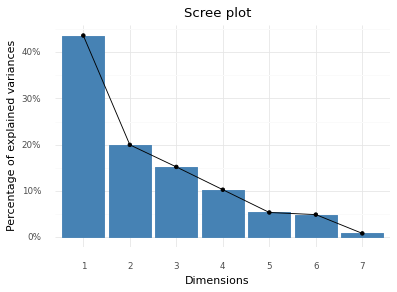

In [9]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(famd)
print(p)

In [10]:
# Coordonnées des individus
famd.ind_["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
Agassi,0.380686,-0.964081,0.078467,0.106937,-0.830249,-0.900920,-0.203247
Becker,-1.089407,1.212790,0.305663,0.325306,0.312247,0.703330,-0.007251
Borg,1.265452,-3.496562,0.276063,2.019215,0.826089,0.327078,0.066909
Connors,3.479658,-1.296227,-0.876927,-0.654768,-0.606017,0.716699,-0.114161
Courier,-1.794557,-0.914695,-0.117700,-0.497172,-0.253942,-0.707134,-0.115922
Djokovic,0.784877,-0.219781,2.117550,-0.262233,0.085526,-0.137544,-0.061391


## LDA model

In [11]:
# Coefficients issus de LDA
res_dismix.lda_model_.coef_

,demi,finale,vainqueur
Z1,-0.156909,-0.099737,0.090313
Z2,0.097946,0.366905,-0.132537
Z3,-0.147749,-0.418917,0.166291
Z4,-0.026316,-0.420204,0.116016
Z5,0.558811,0.087976,-0.254832
Z6,0.520520,0.753650,-0.405296
Z7,-0.693308,-1.279948,0.608865


In [12]:
# Constante issue de LDA
res_dismix.lda_model_.intercept_

,demi,finale,vainqueur
Intercept,-1.550004,-2.27729,-0.596078


## DISMIX Model

In [13]:
# Coefficients du MIXDISC
res_dismix.coef_

,demi,finale,vainqueur
Taille,0.090270,0.091352,-0.060451
Titres,0.099047,0.211051,-0.094032
Finales,-0.119102,-0.112841,0.077836
TitresGC,-0.053090,-0.169085,0.064392
BestClassDouble,0.039130,-0.056887,-0.002083
droitier,-0.041312,-0.108491,0.044336
gaucher,0.165249,0.433966,-0.177345
deux,-0.136913,-0.153698,0.095472
une,0.136913,0.153698,-0.095472


In [14]:
# Constante du MIXDISC
res_dismix.intercept_

,demi,finale,vainqueur
Intercept,-1.550004,-2.27729,-0.596078


In [15]:
X = D.drop(columns=["RolandGarros"])
y = D["RolandGarros"]
pred = res_dismix.predict(X)
pred

Agassi        vainqueur
Becker             demi
Borg          vainqueur
Connors       vainqueur
Courier       vainqueur
Djokovic      vainqueur
Edberg        vainqueur
Federer       vainqueur
Kafelnikov    vainqueur
Kuerten            demi
Lendl         vainqueur
McEnroe          finale
Murray        vainqueur
Nadal         vainqueur
Nastase       vainqueur
Rafter        vainqueur
Safin              demi
Sampras       vainqueur
Vilas         vainqueur
Wilander      vainqueur
Name: prediction, dtype: object

In [16]:
# Accurate
res_dismix.score(X,y)

0.7

In [17]:
res_dismix.pred_table()

prediction,demi,finale,vainqueur
RolandGarros,,,
demi,2,0,3
finale,0,1,2
vainqueur,1,0,11
